In [34]:
import json
import pandas as pd
import numpy as np
import os


In [35]:

f = open('raw_data\industrial-production-business-equipment_metadata.json')
meta_json = json.load(f)

print(meta_json)

{'realtime_start': '2019-12-23', 'realtime_end': '2019-12-23', 'seriess': [{'id': 'IPBUSEQ', 'realtime_start': '2019-12-23', 'realtime_end': '2019-12-23', 'title': 'Industrial Production: Business Equipment', 'observation_start': '1947-01-01', 'observation_end': '2019-11-01', 'frequency': 'Monthly', 'frequency_short': 'M', 'units': 'Index 2012=100', 'units_short': 'Index 2012=100', 'seasonal_adjustment': 'Seasonally Adjusted', 'seasonal_adjustment_short': 'SA', 'last_updated': '2019-12-17 08:28:03-06', 'popularity': 29}]}


In [36]:

df = pd.read_csv('raw_data\IPBUSEQ.csv')
df.drop('realtime_start', axis = 1, inplace=True)
df.drop('realtime_end', axis = 1, inplace=True)

df.head()




,date,value
0,1947-01-01,5.4081
1,1947-02-01,5.4665
2,1947-03-01,5.4957
3,1947-04-01,5.5735
4,1947-05-01,5.6027


In [45]:
master_df = pd.DataFrame()

for each in os.listdir('raw_data'):
    if '.json' in each:
        #print(f'parsing {each}')
        f = open(f'raw_data/{each}')
        meta_json = json.load(f)
        id = meta_json['seriess'][0]['id']
        #print(f"Data file id: {id}")

        #import data from that table
        df = pd.read_csv(f'raw_data\{id}.csv', index_col=2)
        df.drop('realtime_start', axis = 1, inplace=True)
        df.drop('realtime_end', axis = 1, inplace=True)


        master_df[f'{id}'] = df['value']

master_df.tail()

master_df.to_csv('data_merged.csv')
    

<Axes: xlabel='date'>

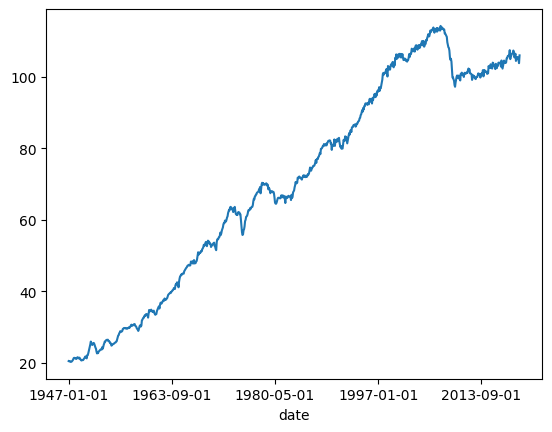

In [46]:
master_df['IPCONGD'].plot()

In [50]:
corr_df = master_df.corr()
corr_df[corr_df > 0.95]

,IPBUSEQ,IPCONGD,IPDCONGD,IPN3311A2RN,IPG3361T3S,IPDMAT,IPUTIL,IPG2211A2N,IPFPNSS,IPFINAL,...,IPGMFN,IPMAN,IPMANSICS,IPMAT,IPG211111CN,IPMINE,IPNCONGD,IPNMAT,IPB51222S,IPB50001N
IPBUSEQ,1.000000,NaN,0.962198,NaN,NaN,0.990448,NaN,NaN,0.967030,0.971550,...,0.990297,0.991742,0.981955,0.986746,NaN,NaN,NaN,NaN,NaN,0.980760
IPCONGD,NaN,1.000000,0.977663,NaN,NaN,NaN,0.991077,0.976620,0.991250,0.988721,...,0.971035,0.972473,0.980413,0.956464,NaN,NaN,0.994340,0.960732,0.983122,0.979570
IPDCONGD,0.962198,0.977663,1.000000,NaN,0.96525,NaN,0.968370,0.953843,0.987369,0.985771,...,0.970202,0.971559,0.990439,0.977298,NaN,NaN,0.950280,NaN,0.951093,0.987369
IPN3311A2RN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPG3361T3S,NaN,NaN,0.965250,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPDMAT,0.990448,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,0.979394,0.980769,0.963833,0.980115,NaN,NaN,NaN,NaN,NaN,0.963606
IPUTIL,NaN,0.991077,0.968370,NaN,NaN,NaN,1.000000,0.985409,0.990171,0.990490,...,0.980031,0.981458,0.982707,0.972042,NaN,NaN,0.985750,NaN,0.997044,0.986335
IPG2211A2N,NaN,0.976620,0.953843,NaN,NaN,NaN,0.985409,1.000000,0.975564,0.975894,...,NaN,NaN,0.968089,0.957330,NaN,NaN,0.971562,NaN,0.977656,0.971758
IPFPNSS,0.967030,0.991250,0.987369,NaN,NaN,NaN,0.990171,0.975564,1.000000,0.999667,...,0.989824,0.991305,0.996769,0.979584,NaN,NaN,0.976131,NaN,0.979264,0.994982
IPFINAL,0.971550,0.988721,0.985771,NaN,NaN,NaN,0.990490,0.975894,0.999667,1.000000,...,0.992071,0.993537,0.997524,0.982685,NaN,NaN,0.973063,NaN,0.980085,0.996267
